# 04. 그래프 그리기
## 04-1. 데이터 시각화가 필요한 이유

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [6]:
os.chdir('C:\\Users\\James\\Documents\\GitHub\\doit_pandas\\data')
os.getcwd()

'C:\\Users\\James\\Documents\\GitHub\\doit_pandas\\data'

In [8]:
anscombe_raw = sns.load_dataset('anscombe')
anscombe = anscombe_raw.copy()
anscombe.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [10]:
anscombe.shape

(44, 3)

In [8]:
import matplotlib.pyplot as plt

In [12]:
dataset_1 = anscombe[anscombe['dataset'] == 'I']
dataset_1.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


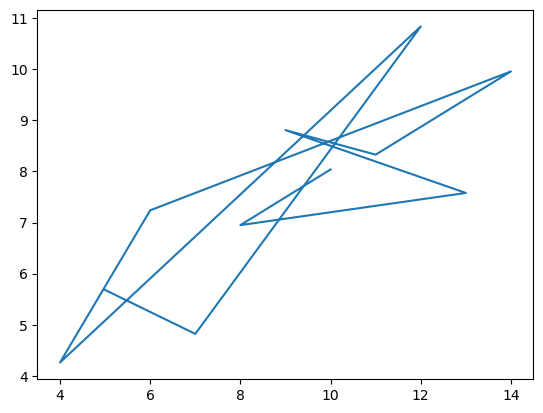

In [11]:
plt.plot(dataset_1['x'], dataset_1['y']);

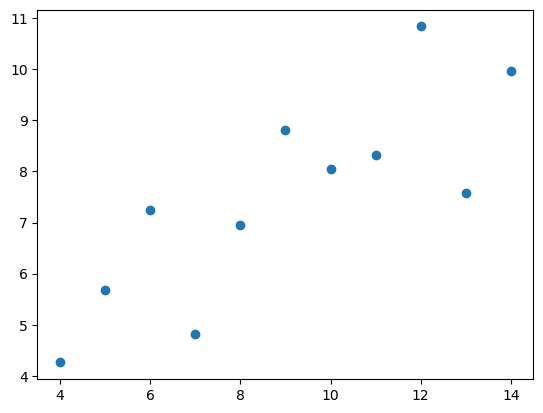

In [16]:
plt.plot(dataset_1['x'], dataset_1['y'], 'o');

### (p.84) 한 번에 4개의 그래프 그리기

In [17]:
dataset_2 = anscombe[anscombe['dataset'] == 'II']
dataset_3 = anscombe[anscombe['dataset'] == 'III']
dataset_4 = anscombe[anscombe['dataset'] == 'IV']

In [18]:
dataset_2.head()

,dataset,x,y
11,II,10.0,9.14
12,II,8.0,8.14
13,II,13.0,8.74
14,II,9.0,8.77
15,II,11.0,9.26


In [19]:
dataset_3.head()

,dataset,x,y
22,III,10.0,7.46
23,III,8.0,6.77
24,III,13.0,12.74
25,III,9.0,7.11
26,III,11.0,7.81


In [20]:
dataset_4.head()

,dataset,x,y
33,IV,8.0,6.58
34,IV,8.0,5.76
35,IV,8.0,7.71
36,IV,8.0,8.84
37,IV,8.0,8.47


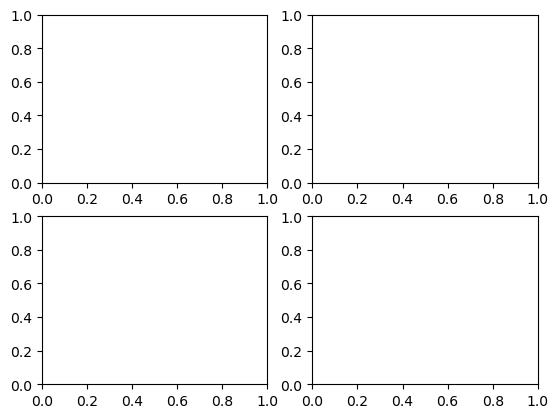

In [21]:
fig = plt.figure()
axes1 = fig.add_subplot(2, 2, 1)
axes2 = fig.add_subplot(2, 2, 2)
axes3 = fig.add_subplot(2, 2, 3)
axes4 = fig.add_subplot(2, 2, 4)

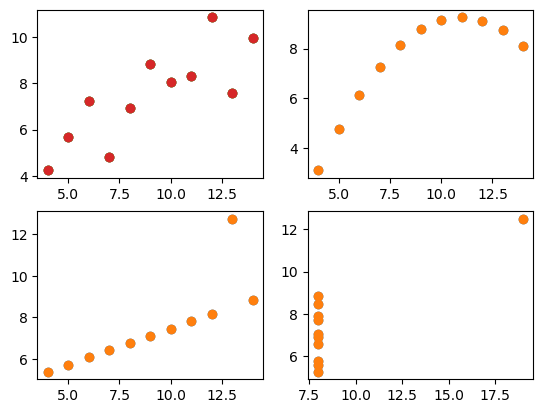

In [25]:
axes1.plot(dataset_1['x'], dataset_1['y'], 'o')
axes2.plot(dataset_2['x'], dataset_2['y'], 'o')
axes3.plot(dataset_3['x'], dataset_3['y'], 'o')
axes4.plot(dataset_4['x'], dataset_4['y'], 'o')
fig

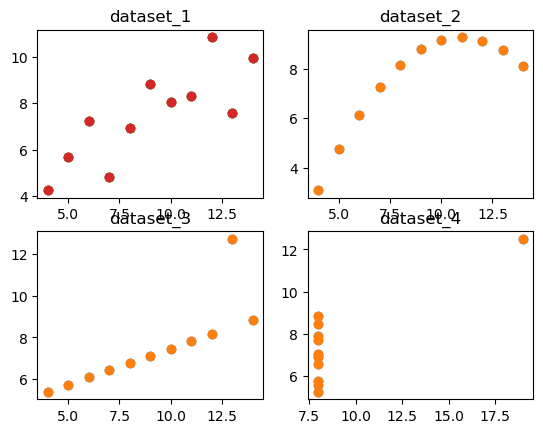

In [26]:
axes1.set_title('dataset_1')
axes2.set_title('dataset_2')
axes3.set_title('dataset_3')
axes4.set_title('dataset_4')
fig

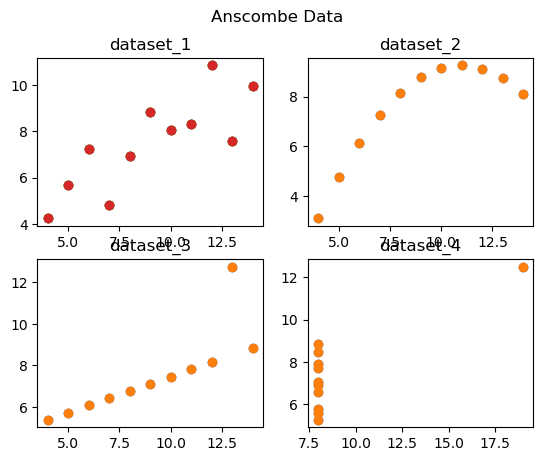

In [27]:
fig.suptitle('Anscombe Data')
fig

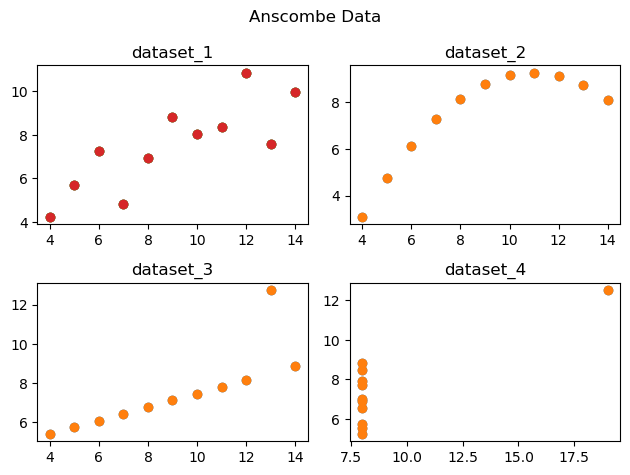

In [28]:
fig.tight_layout()
fig

## 04-2. matplotlib 라이브러리 자유자재로 사용하기

In [ ]:
import seaborn as sns

In [46]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [47]:
tips.shape

(244, 7)

In [48]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [49]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [50]:
type(tips)

pandas.core.frame.DataFrame

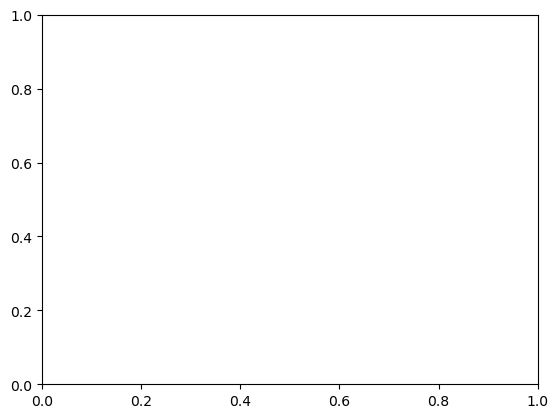

In [61]:
fig = plt.figure()
axes1 = fig.add_subplot(1, 1, 1)

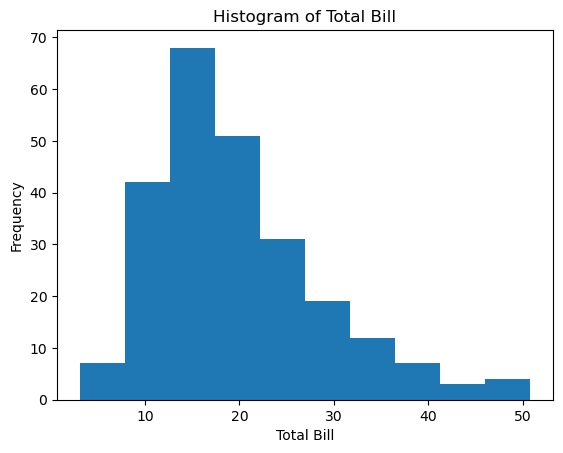

In [62]:
axes1.hist(tips['total_bill'], bins = 10)
axes1.set_title('Histogram of Total Bill')
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('Frequency')
fig

Text(0, 0.5, 'Tip')

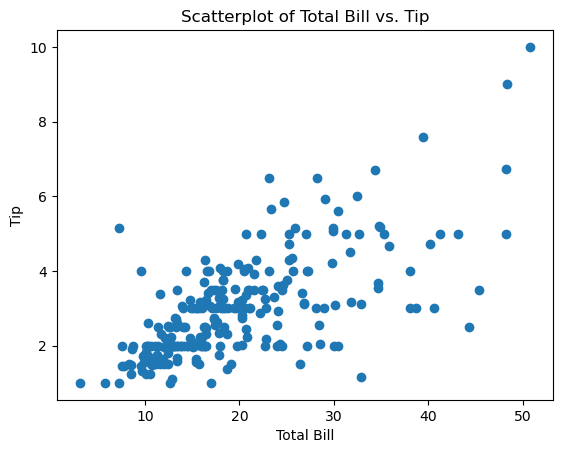

In [63]:
scatter_plot = plt.figure()
axes1 = scatter_plot.add_subplot(1, 1, 1)
axes1.scatter(tips['total_bill'], tips['tip'])
axes1.set_title('Scatterplot of Total Bill vs. Tip')
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('Tip')

Text(0.5, 1.0, 'Boxplot of Tips by Sex')

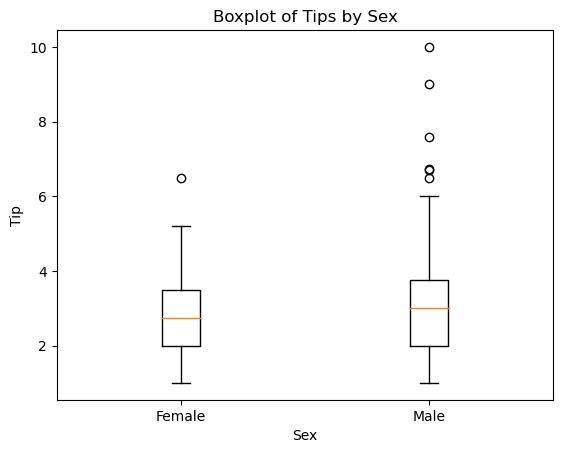

In [65]:
box_plot = plt.figure()
axes1 = box_plot.add_subplot(1, 1, 1)
axes1.boxplot([tips[tips['sex'] == 'Female']['tip'],
               tips[tips['sex'] == 'Male']['tip']],
              labels = ['Female', 'Male'])
axes1.set_xlabel('Sex')
axes1.set_ylabel('Tip')
axes1.set_title('Boxplot of Tips by Sex')

### (p.93) 다변량 그래프

In [73]:
def recode_sex(sex):
    if sex == 'Female':
        return 0
    else:
        return 1

In [67]:
tips['sex_color'] = tips['sex'].apply(recode_sex)
tips.head()

,total_bill,tip,sex,smoker,day,time,size,sex_color
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0


Text(0, 0.5, 'Tip')

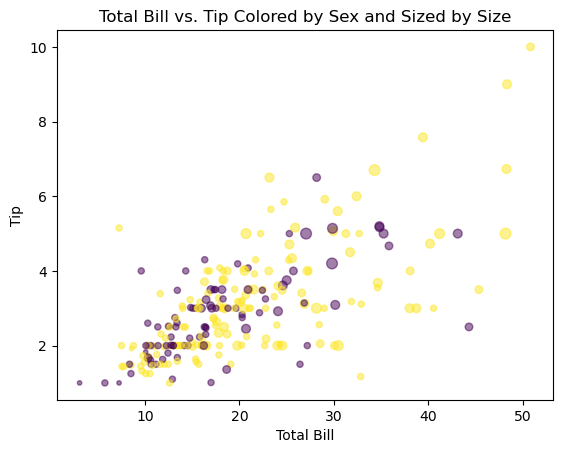

In [68]:
scatter_plot = plt.figure()
axes1 = scatter_plot.add_subplot(1, 1, 1)
axes1.scatter(x = tips['total_bill'],
              y = tips['tip'],
              s = tips['size'] * 10,
              c = tips['sex_color'],
              alpha = 0.5)
axes1.set_title('Total Bill vs. Tip Colored by Sex and Sized by Size')
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('Tip')

In [75]:
def digit_sex(sex):
    if sex == 'Female':
        return 0
    elif sex == 'Male':
        return 1
    else:
        return 9

In [76]:
df = pd.DataFrame({'id'   : [1, 2, 3],
                   'name' : ['Kim', 'Lee', 'Park'],
                   'sex'  : ['Female', 'NoInfo', 'Male']})
df

,id,name,sex
0,1,Kim,Female
1,2,Lee,NoInfo
2,3,Park,Male


In [77]:
df['sex_recode'] = df['sex'].apply(digit_sex)
df

,id,name,sex,sex_recode
0,1,Kim,Female,0
1,2,Lee,NoInfo,9
2,3,Park,Male,1


## 04-3. seaborn 라이브러리 자유자재로 사용하기

In [69]:
import seaborn as sns

In [78]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Total Bill Histogram with Density Plot')

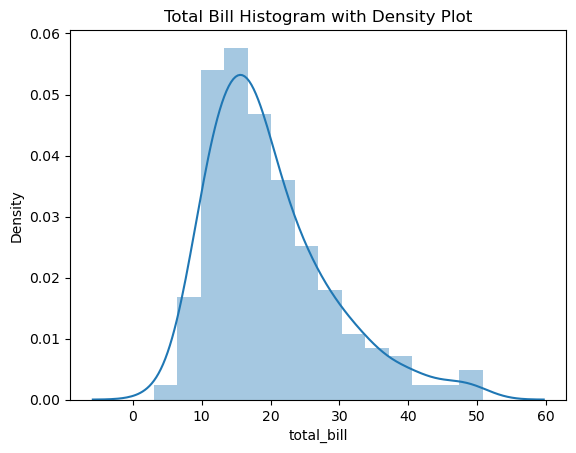

In [79]:
ax = plt.subplots()
ax = sns.distplot(tips['total_bill'])
ax.set_title('Total Bill Histogram with Density Plot')

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Fretuency')

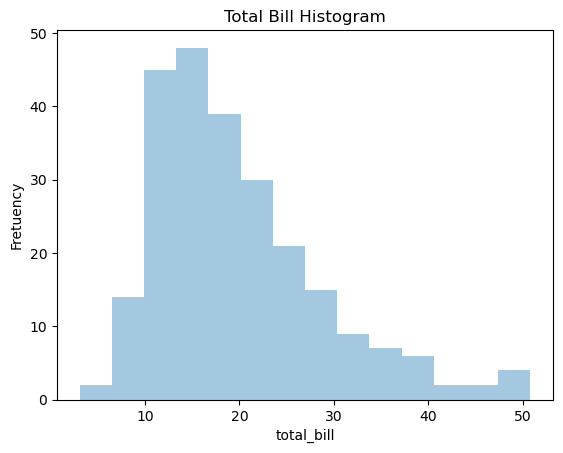

In [88]:
# 히스토그램 그래프만 표시하고 밀집도 그래프는 삭제
ax = plt.subplots()
ax = sns.distplot(tips['total_bill'], kde = False)
ax.set_title('Total Bill Histogram')
ax.set_xlabel('total_bill')
ax.set_ylabel('Fretuency')

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Unit Probability')

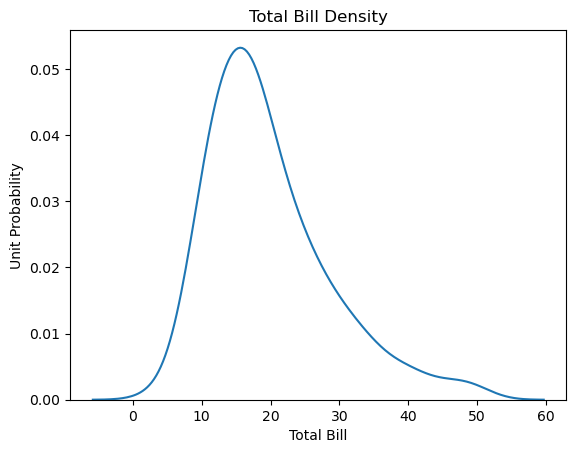

In [89]:
# 밀집도 그래프만 표시하고 히스토그램 그래프는 삭제
ax = plt.subplots()
ax = sns.distplot(tips['total_bill'], hist = False)
ax.set_title('Total Bill Density')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Unit Probability')

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Total Bill')

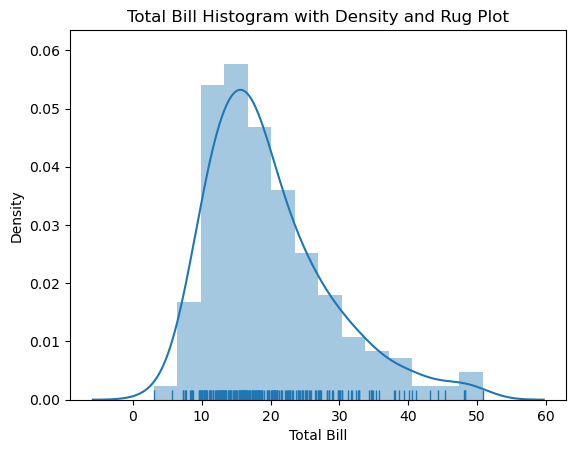

In [92]:
# 양탄자 그래프 추가
ax = plt.subplots()
ax = sns.distplot(tips['total_bill'], rug = True)
ax.set_title('Total Bill Histogram with Density and Rug Plot')
ax.set_xlabel('Total Bill')

Text(0, 0.5, 'Frequency')

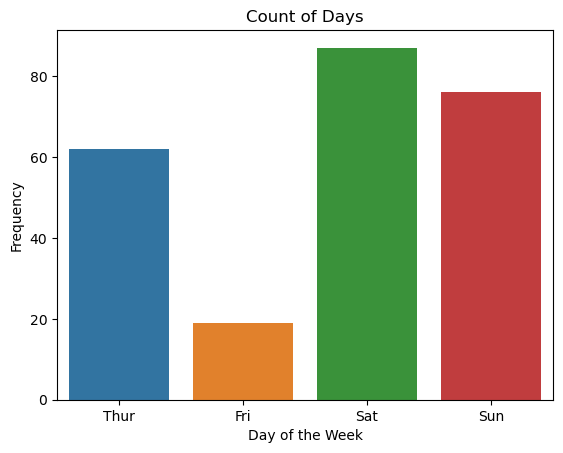

In [104]:
# count 그래프
ax = plt.subplots()
ax = sns.countplot(data = tips, x = 'day')
ax.set_title('Count of Days')
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Frequency')

### (p.99) 1. seaborn 라이브러리로 산점도 그래프 그리기

Text(0, 0.5, 'Tip')

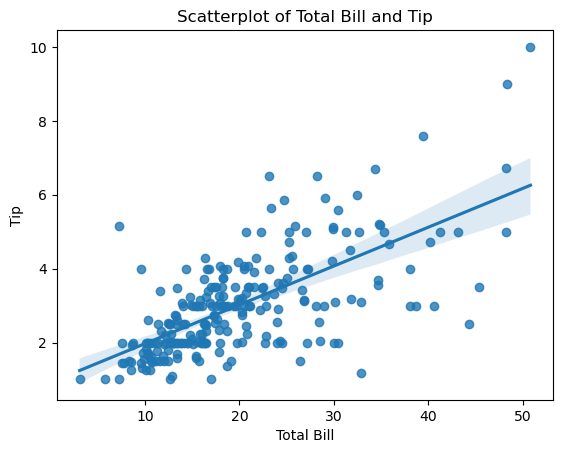

In [105]:
ax = plt.subplots()
ax = sns.regplot(data = tips, x = 'total_bill', y = 'tip')
ax.set_title('Scatterplot of Total Bill and Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')

Text(0, 0.5, 'Tip')

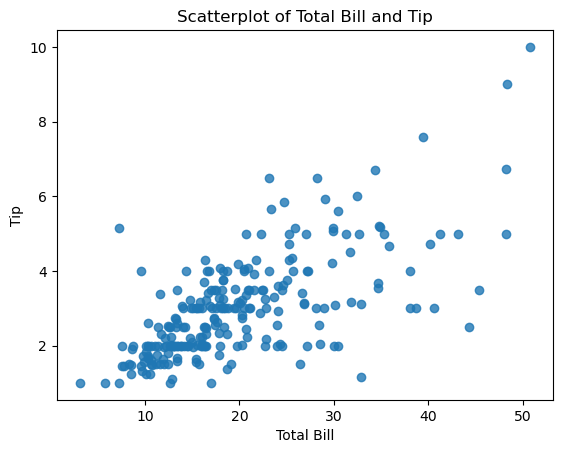

In [106]:
ax = plt.subplots()
ax = sns.regplot(data = tips, x = 'total_bill', y = 'tip', fit_reg = False)
ax.set_title('Scatterplot of Total Bill and Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')

### 2. 산점도 그래프와 히스토그램을 한 번에 그리기

Text(0.5, 1.03, 'Joint Plot of Total Bill and Tip')

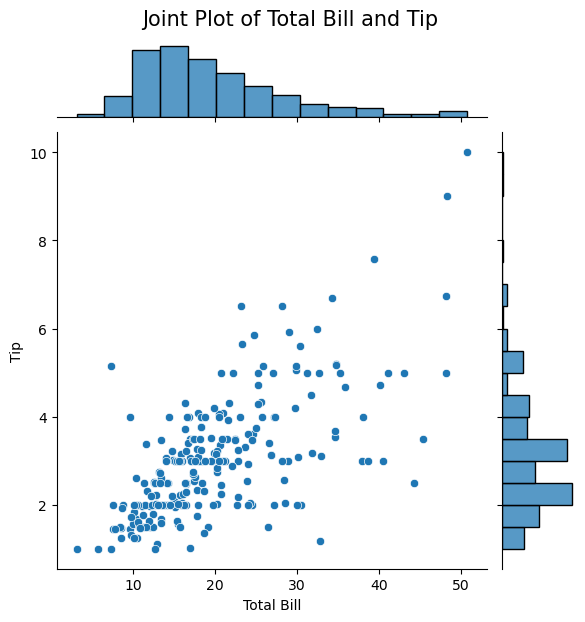

In [115]:
joint = sns.jointplot(data = tips, x = 'total_bill', y = 'tip')
joint.set_axis_labels(xlabel = 'Total Bill', ylabel = 'Tip')
joint.fig.suptitle('Joint Plot of Total Bill and Tip', fontsize = 15, y = 1.03)

### 3. 육각그래프(hexbin) 그리기

Text(0.5, 1.03, 'Hexbin Joint Plot of Total Bill and Tip')

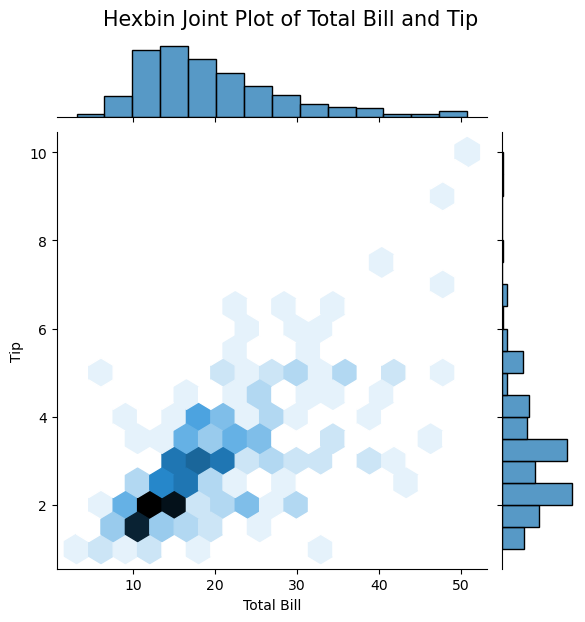

In [117]:
hexbin = sns.jointplot(data = tips, x = 'total_bill', y = 'tip', kind = 'hex')
hexbin.set_axis_labels(xlabel = 'Total Bill', ylabel = 'Tip')
hexbin.fig.suptitle('Hexbin Joint Plot of Total Bill and Tip', fontsize = 15, y = 1.03)

### 4. 이차원 밀집도 그리기

Text(0, 0.5, 'Tip')

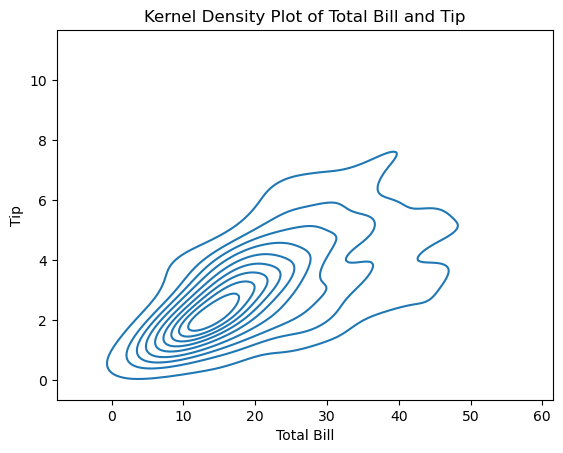

In [122]:
ax = plt.subplots()
ax = sns.kdeplot(data = tips, x = 'total_bill', y = 'tip')
ax.set_title('Kernel Density Plot of Total Bill and Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')

Text(0, 0.5, 'Tip')

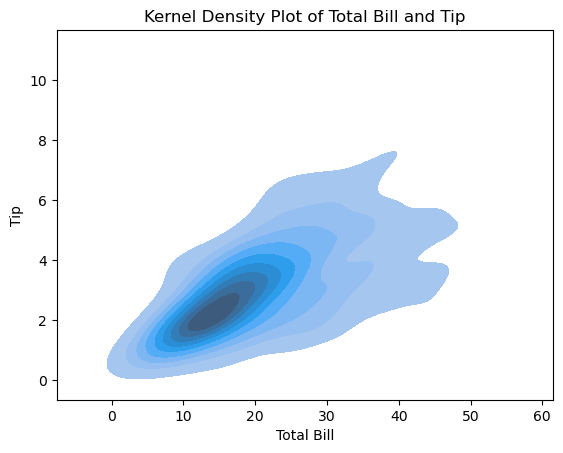

In [123]:
ax = plt.subplots()
ax = sns.kdeplot(data = tips, x = 'total_bill', y = 'tip', shade = True)
ax.set_title('Kernel Density Plot of Total Bill and Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')

### 5. 바(bar) 그래프 그리기

Text(0, 0.5, 'Average Total Bill')

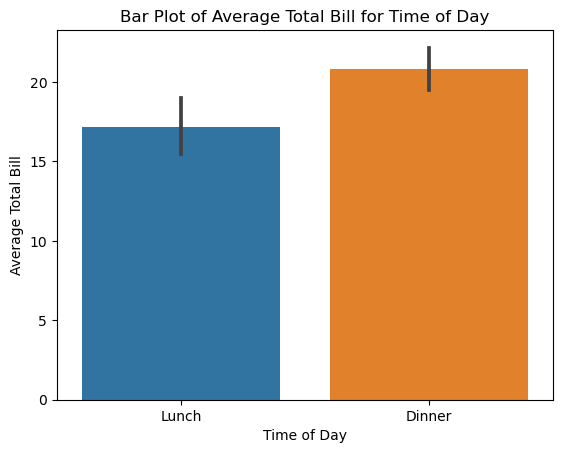

In [126]:
ax = plt.subplots()
ax = sns.barplot(data=tips, x='time', y='total_bill')
ax.set_title('Bar Plot of Average Total Bill for Time of Day')
ax.set_xlabel('Time of Day')
ax.set_ylabel('Average Total Bill')

### 6. 박스 그래프 그리기

Text(0, 0.5, 'Total Bill')

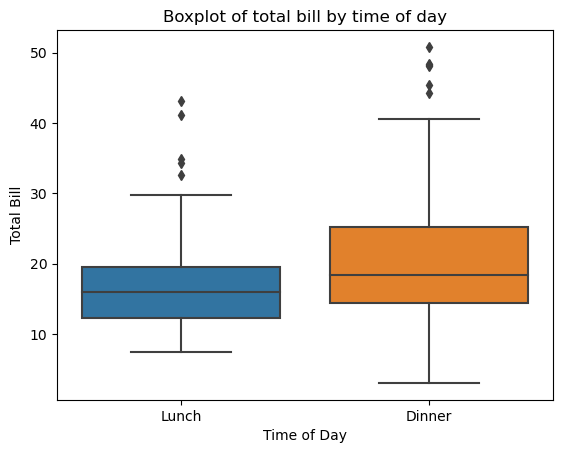

In [129]:
ax = plt.subplots()
ax = sns.boxplot(data = tips, x = 'time', y = 'total_bill')
ax.set_title('Boxplot of total bill by time of day')
ax.set_xlabel('Time of Day')
ax.set_ylabel('Total Bill')

### 7. 바이올린 그래프

Text(0, 0.5, 'Total bill')

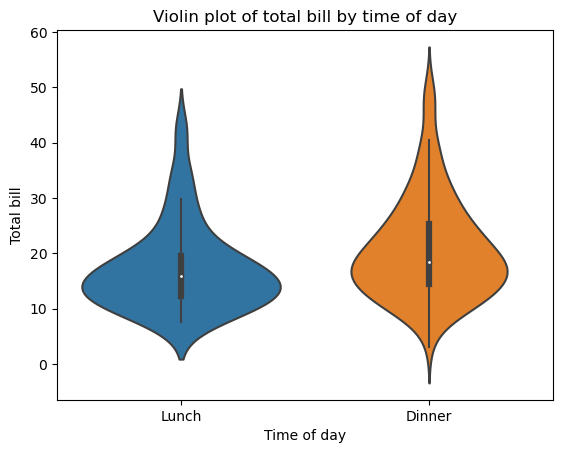

In [131]:
ax = plt.subplots()
ax = sns.violinplot(data = tips, x = 'time', y = 'total_bill')
ax.set_title('Violin plot of total bill by time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Total bill')

### 8. 관계 그래프 그리기

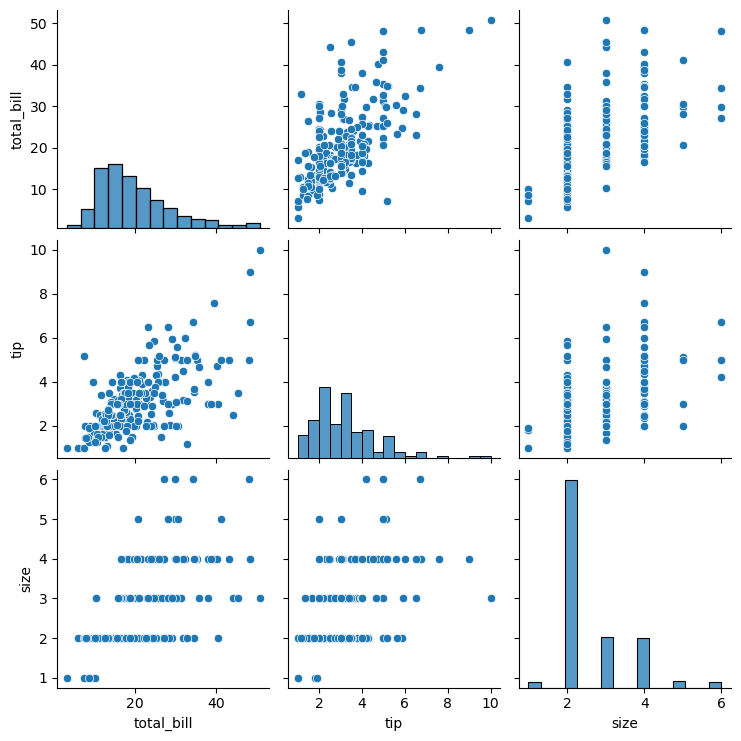

In [133]:
fig = sns.pairplot(tips)

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distribut

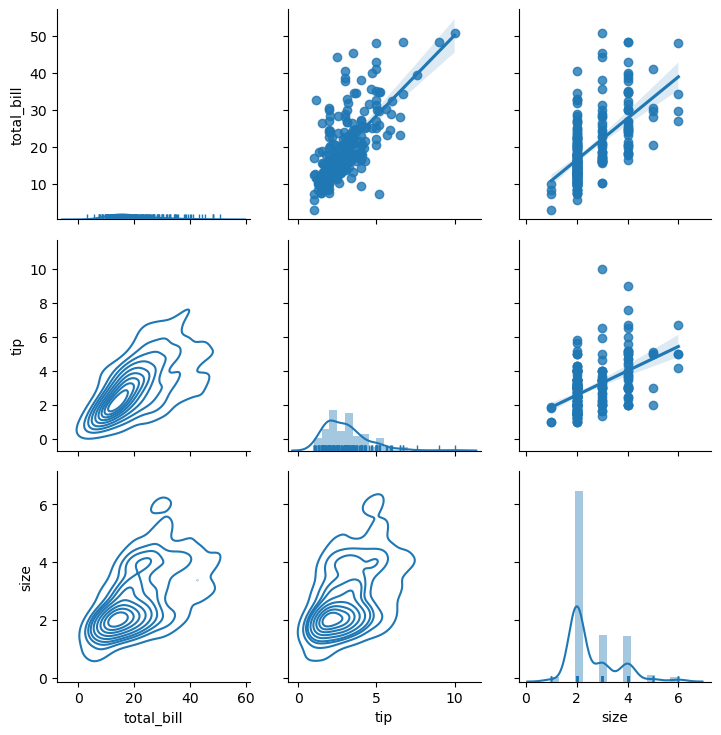

In [134]:
pair_grid = sns.PairGrid(tips)
pair_grid = pair_grid.map_upper(sns.regplot)
pair_grid = pair_grid.map_lower(sns.kdeplot)
pair_grid = pair_grid.map_diag(sns.distplot, rug = True)
plt.show()

### (p.106) 다변량 그래프 그리기
### 1. seaborn 라이브러리로 바이올린 그래프 그리기 - 색상추가

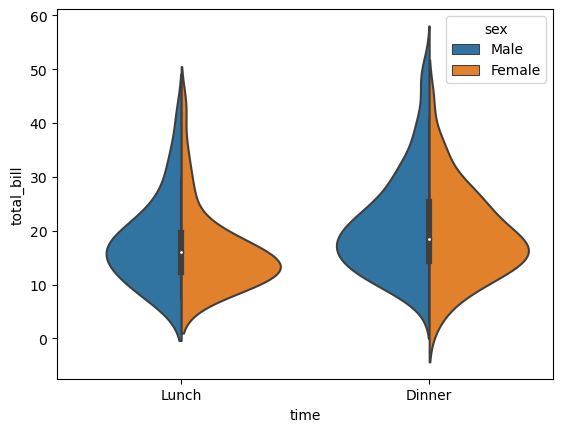

In [135]:
ax = plt.subplots()
ax = sns.violinplot(data = tips, x='time', y='total_bill', hue = 'sex', split = True)

### 2. 산점도, 관계 그래프 그리기 - 색상추가

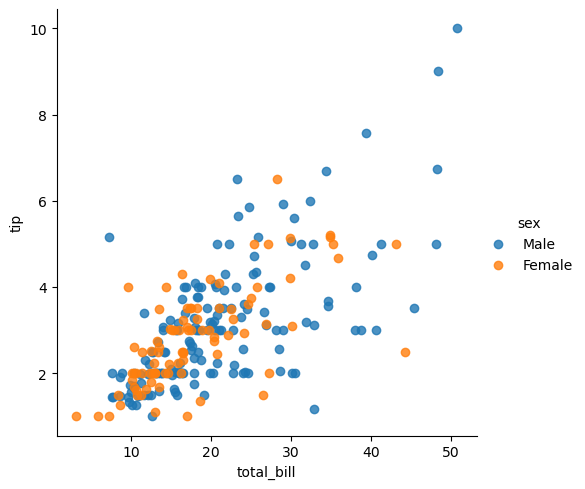

In [139]:
scatter = sns.lmplot(data=tips, x='total_bill', y='tip', hue='sex', fit_reg = False)

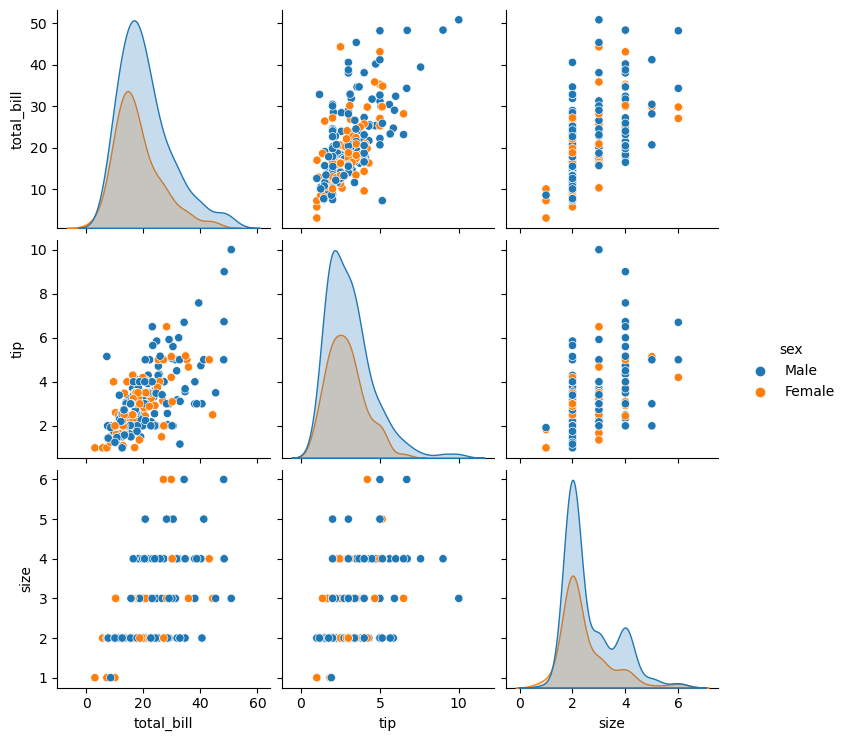

In [140]:
fig = sns.pairplot(tips, hue = 'sex')

### 3. 산점도 그래프의 크기와 모양 조절하기

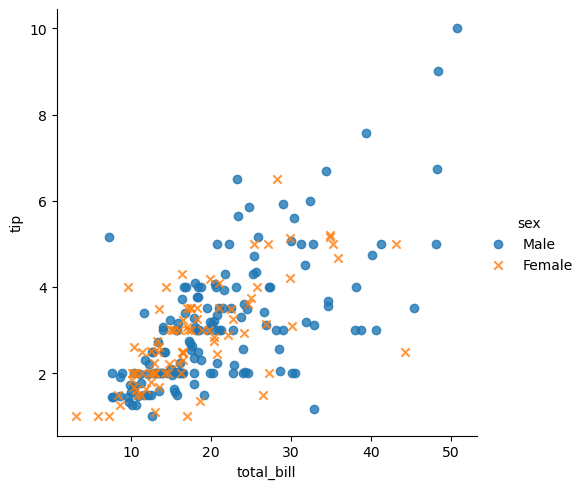

In [134]:
scatter = sns.lmplot(data = tips, x = 'total_bill', y = 'tip', hue = 'sex', fit_reg = False,
                     markers = ['o', 'x'])
                     #scatter_kws = {'s' : tips['size']*10})

### 5. lmplot 메서드로 4개의 데이터 그룹에 대한 그래프 한 번에 그리기

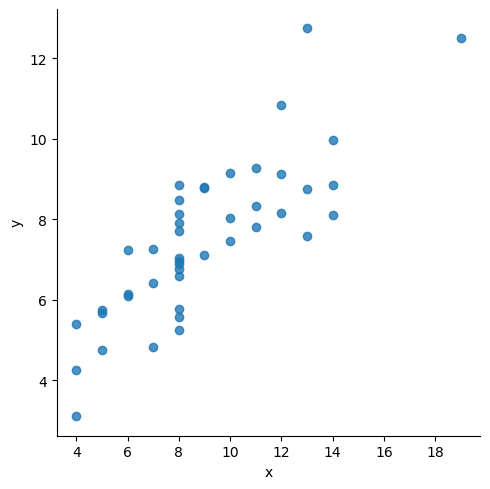

In [142]:
anscombe_plot = sns.lmplot(data=anscombe, x='x', y='y', fit_reg = False)

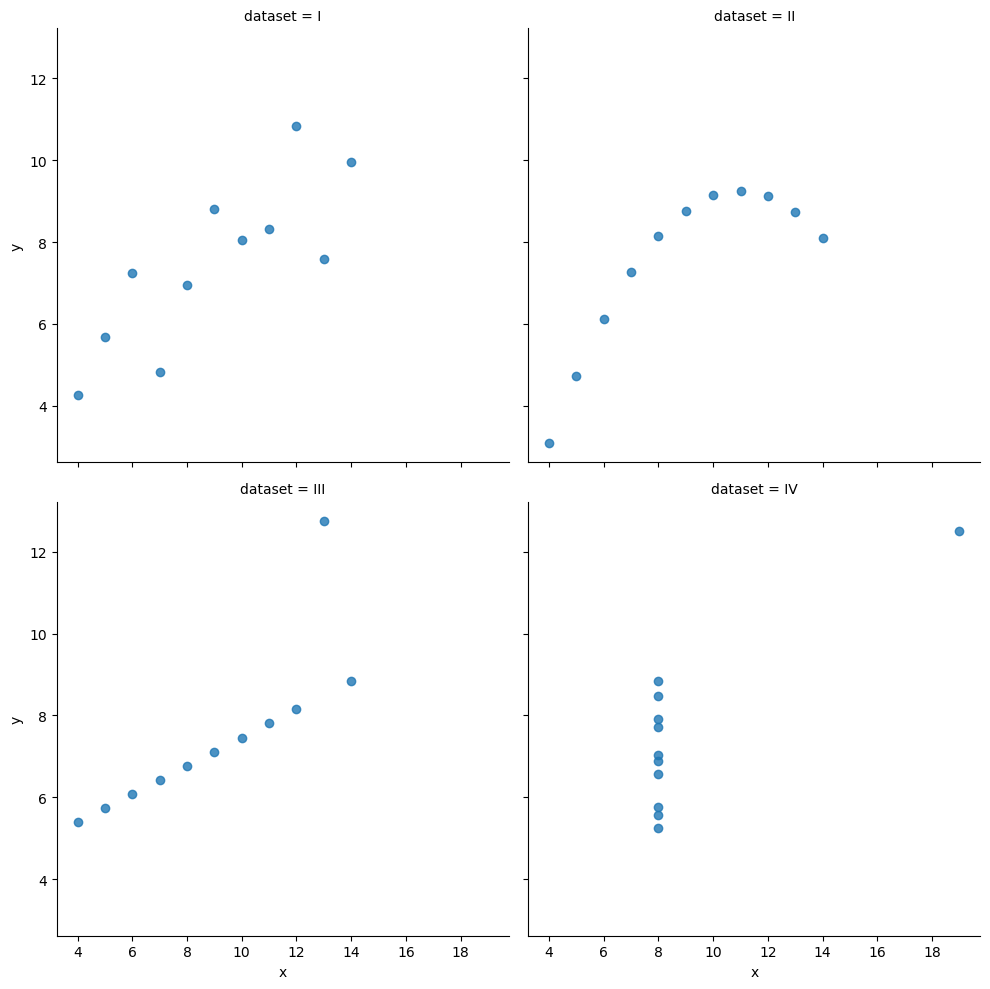

In [143]:
anscombe_plot = sns.lmplot(data=anscombe, x='x', y='y', fit_reg=False,
                           col='dataset', col_wrap=2)

### (p.111) FacetGrid 클래스로 그룹별 그래프 그리기

C:\Users\James\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\James\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


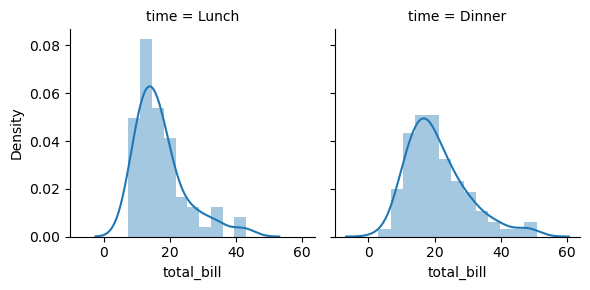

In [144]:
facet = sns.FacetGrid(data=tips, col='time')
facet.map(sns.distplot, 'total_bill', rug=False)

C:\Users\James\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\James\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\James\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\James\anaconda3\lib\site-packages\seaborn\distr

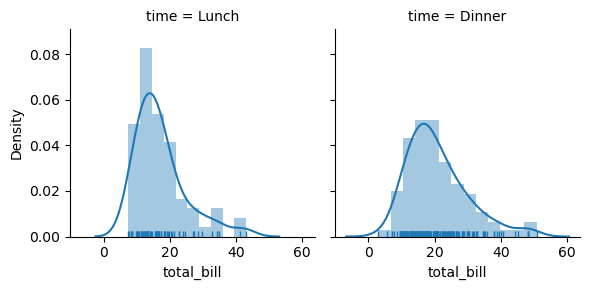

In [150]:
facet = sns.FacetGrid(data=tips, col='time')
facet.map(sns.distplot, 'total_bill', rug=True)

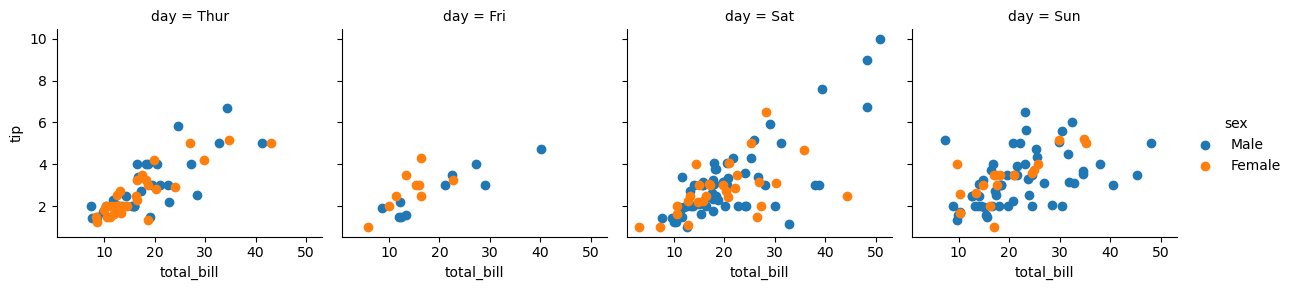

In [154]:
facet = sns.FacetGrid(tips, col='day', hue='sex')
facet = facet.map(plt.scatter, 'total_bill', 'tip') \
             .add_legend()

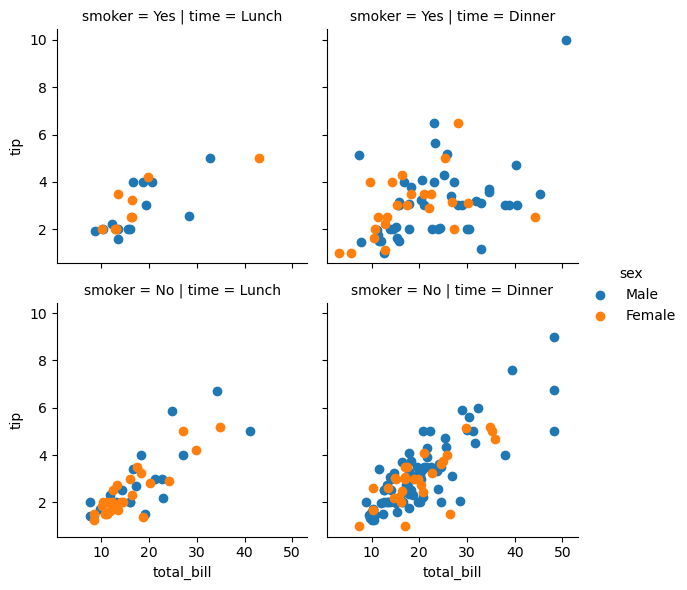

In [157]:
facet = sns.FacetGrid(tips, col='time', row='smoker', hue='sex')
facet = facet.map(plt.scatter, 'total_bill', 'tip').add_legend()

## 04-4. 데이터프레임과 시리즈로 그래프 그리기

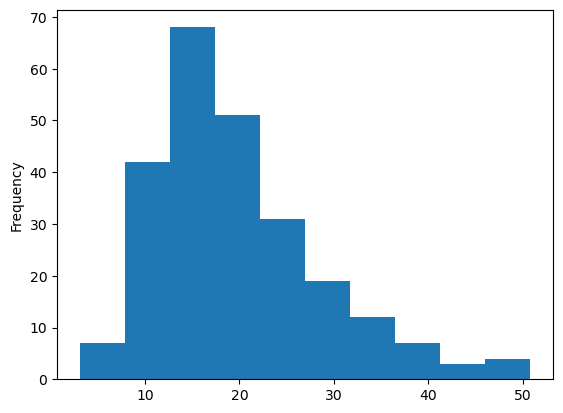

In [158]:
ax = plt.subplots()
ax = tips['total_bill'].plot.hist()

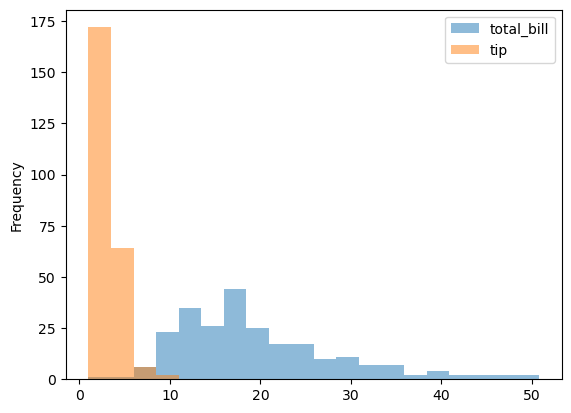

In [159]:
fig, ax = plt.subplots()
ax = tips[['total_bill', 'tip']].plot.hist(alpha=0.5, bins=20, ax=ax)

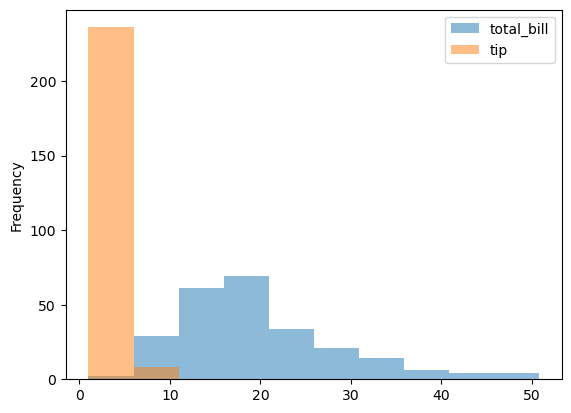

In [170]:
fig, ax = plt.subplots()
ax = tips[['total_bill', 'tip']].plot.hist(alpha=0.5, bins=10, ax=ax)

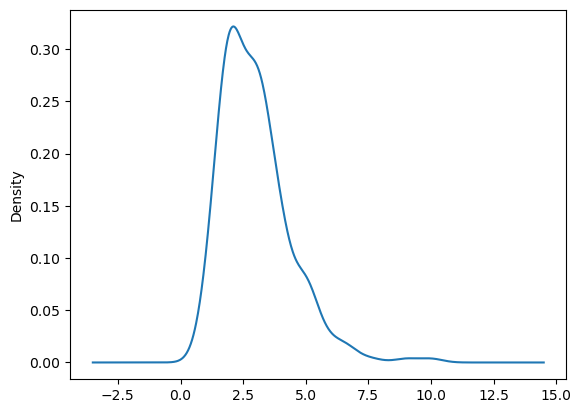

In [176]:
ax = plt.subplots()
ax = tips['tip'].plot.kde()

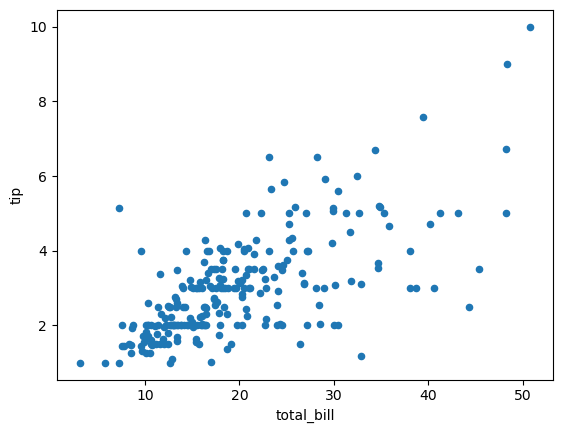

In [184]:
fig, ax = plt.subplots()
ax = tips.plot.scatter(x='total_bill', y='tip', ax=ax)

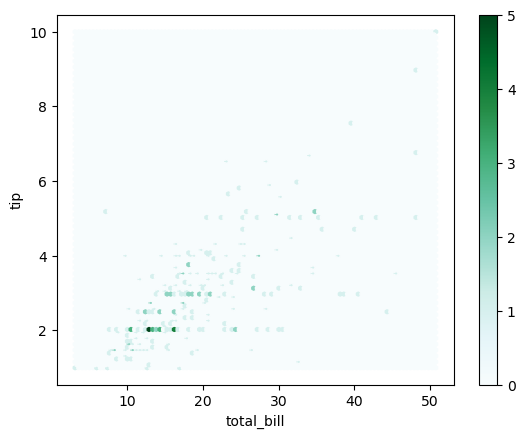

In [188]:
fig, ax = plt.subplots()
ax = tips.plot.hexbin(x='total_bill', y='tip', ax=ax)

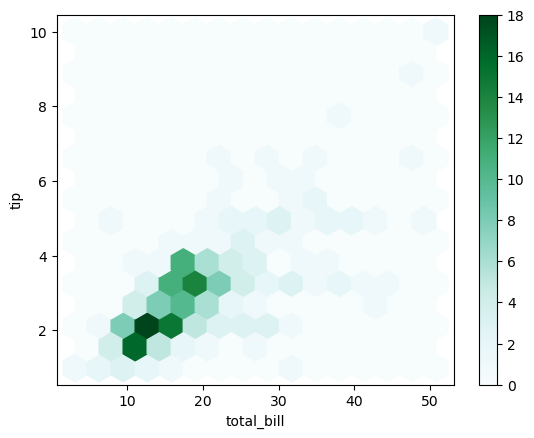

In [192]:
fig, ax = plt.subplots()
ax = tips.plot.hexbin(x='total_bill', y='tip', gridsize = 15, ax=ax)

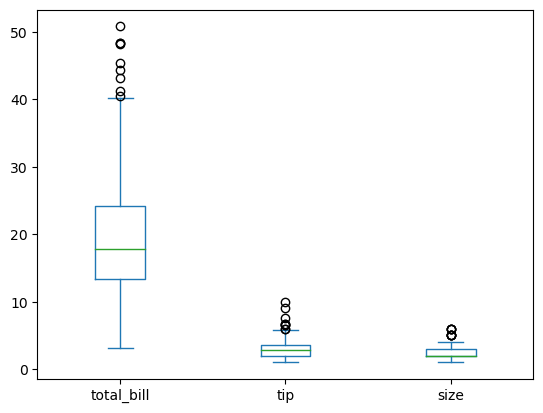

In [194]:
fig, ax = plt.subplots()
ax = tips.plot.box(ax=ax)

### 04-5. seaborn 라이브러리로 그래프 스타일 설정하기

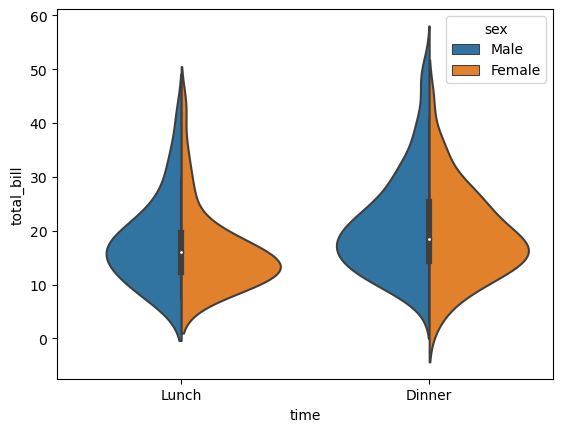

In [195]:
fig, ax = plt.subplots()
ax = sns.violinplot(data=tips, x='time', y='total_bill', hue='sex', split=True)

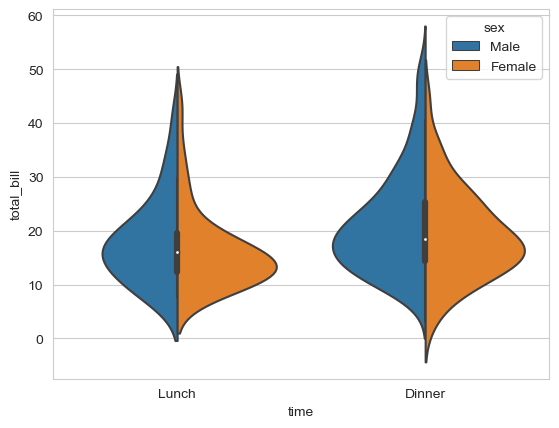

In [200]:
sns.set_style('whitegrid')
fig, ax = plt.subplots()
ax = sns.violinplot(data=tips, x='time', y='total_bill', hue='sex', split=True)

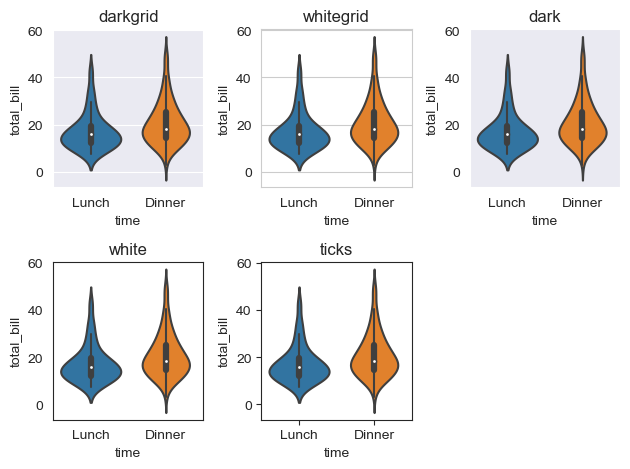

In [202]:
fig = plt.figure()

seaborn_style = ['darkgrid', 'whitegrid', 'dark', 'white', 'ticks']

for idx, style in enumerate(seaborn_style):
    plot_position = idx + 1
    with sns.axes_style(style):
        ax = fig.add_subplot(2, 3, plot_position)
        violin = sns.violinplot(data=tips, x='time', y='total_bill', ax=ax)
        violin.set_title(style)

fig.tight_layout()